In [1]:
# 3. Advanced Tier Breakdown
print("\n🎯 Advanced Tier Analysis by Position")
print("=" * 50)

if champions is not None:
    north_star = analyzer.get_north_star(champions)
    
    for pos in ['RB', 'WR', 'QB', 'TE']:
        if pos in north_star:
            print(f"\n{pos} TIER BREAKDOWN:")
            print("-" * 25)
            
            tiers = analyzer.create_tiers(champions, pos)
            
            if tiers:
                # Group by tier
                tier_groups = {}
                for player, data in tiers.items():
                    tier = data['tier']
                    if tier not in tier_groups:
                        tier_groups[tier] = []
                    tier_groups[tier].append((player, data))
                
                # Display each tier
                for tier in sorted(tier_groups.keys()):
                    players = sorted(tier_groups[tier], key=lambda x: x[1]['champion_rate'], reverse=True)
                    print(f"  Tier {tier}: {len(players)} players")
                    
                    # Show top 3 players in tier
                    for i, (player, data) in enumerate(players[:3]):
                        print(f"    {i+1}. {player[:20]:20} {data['champion_rate']:.1%} champion rate")
                    
                    if len(players) > 3:
                        print(f"    ... and {len(players)-3} more")
                    print()
            else:
                print(f"  No tier data available for {pos}")
else:
    print("❌ Cannot perform tier analysis - no championship data")


🎯 Advanced Tier Analysis by Position


NameError: name 'champions' is not defined

In [ ]:
# 2. Dynamic Round Analysis  
print("\n🔄 Dynamic Round-by-Round Analysis")
print("=" * 50)

analyzer = ChampionshipDNA()
champions = analyzer.load_champions(strategy=STRATEGY, top_pct=0.1)

if champions is not None:
    # Analyze multiple rounds
    rounds_to_analyze = [1, 3, 5, 7]
    
    for round_num in rounds_to_analyze:
        print(f"\n--- ROUND {round_num} ANALYSIS ---")
        windows = analyzer.calculate_windows(champions, round_num)
        analyzer.display_windows(windows, round_num)
        
        if round_num < max(rounds_to_analyze):
            print("-" * 30)
            
else:
    print("❌ Cannot perform dynamic round analysis - no championship data")

In [ ]:
# 1. Championship Blueprint Analysis
print("🧬 Championship DNA Analysis - Extracting Winning Patterns")
print("=" * 60)

# Run complete championship analysis
results = run_championship_analysis(strategy=STRATEGY, round_num=3)

if results:
    print("\n✅ Championship DNA analysis complete")
    print(f"📊 Analyzed top 10% performers from {STRATEGY} strategy")
    print("📋 Generated 3-card guidance system:")
    print("   • Championship Blueprint (ideal roster composition)")
    print("   • Pick Windows (round-based position probabilities)")  
    print("   • Pivot Alerts (tier scarcity warnings)")
else:
    print("❌ Championship DNA analysis failed")
    print(f"   No data found for strategy: {STRATEGY}")
    print(f"   Ensure you have simulation data: python monte_carlo_runner.py export --strategy {STRATEGY} --pick {MY_PICK} --n-sims {N_SIMS}")

In [ ]:
# Import Championship DNA analyzer
import sys
sys.path.append('..')

from championship_dna_analyzer import ChampionshipDNA, run_championship_analysis

print("✅ Championship DNA analyzer loaded")

## 🧬 Championship DNA Analysis

Identify winning roster patterns from top-performing simulations and generate draft guidance.

This hybrid system combines championship roster composition analysis with tier-based pick windows and pivot alerts.

# Monte Carlo Draft Simulation Visualizations

Interactive analysis of fantasy football draft simulations with position probabilities, replacement values, and strategy comparisons.

## Quick Start Guide

1. **Generate simulation data first:**
   ```bash
   python monte_carlo_runner.py export --strategy balanced --pick 5 --n-sims 200
   python monte_carlo_runner.py export --strategy zero_rb --pick 5 --n-sims 200
   # Repeat for other strategies as needed
   ```

2. **Run this notebook** - all cells use pre-generated data for fast execution

3. **Modify parameters** in the configuration cell below

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')

try:
    import ipywidgets as widgets
    from IPython.display import display
except ImportError:
    print("⚠️ ipywidgets not available - interactive features disabled")
    widgets = None

# Reload the module to get new functions
import importlib
import efficient_viz_helpers
importlib.reload(efficient_viz_helpers)

# Efficient visualization helpers
from efficient_viz_helpers import (
    SimulationCache, 
    load_simulation_data, 
    load_multiple_strategies,
    ensure_simulation_data_exists,
    calculate_replacement_vectorized,
    create_overview_summary,
    load_full_player_universe,
    calculate_position_ranks_fixed,
    create_position_value_curves,
    create_availability_heatmap,
    create_interactive_availability_heatmap,  # NEW: Interactive heatmap with slider
    create_roster_timeline,
    create_strategy_radar_chart,
    create_win_probability_curves,
    create_decision_cards  # NEW: Decision cards for draft recommendations
)

# Style configuration
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

print("✅ Libraries loaded successfully")

✅ Libraries loaded successfully


In [ ]:
# Configuration - Modify these parameters as needed
STRATEGY = 'balanced'  # Primary strategy to analyze
MY_PICK = 5           # Your draft position (1-14)
N_SIMS = 200          # Number of simulations (200+ recommended)
N_ROUNDS = 14         # Draft rounds

# Initialize cache for intermediate results
cache = SimulationCache()

print(f"📋 Configuration:")
print(f"   Strategy: {STRATEGY}")
print(f"   Draft Pick: #{MY_PICK}")
print(f"   Simulations: {N_SIMS}")
print(f"   Rounds: {N_ROUNDS}")

📋 Configuration:
   Strategy: balanced
   Draft Pick: #5
   Simulations: 200
   Rounds: 14


## 📊 Overview Summary

Quick overview of simulation results and key insights.

In [ ]:
# Load primary strategy data
start_time = time.time()
sims_df = load_simulation_data(strategy=STRATEGY, my_pick=MY_PICK, n_sims=N_SIMS)

if sims_df is None:
    print("❌ No simulation data found!")
    print(f"Generate data with: python monte_carlo_runner.py export --strategy {STRATEGY} --pick {MY_PICK} --n-sims {N_SIMS}")
else:
    load_time = time.time() - start_time
    
    # Calculate replacement values efficiently
    sims_df, replacement_df = calculate_replacement_vectorized(sims_df)
    
    # Create comprehensive overview
    overview_stats = create_overview_summary(sims_df, STRATEGY, N_SIMS, load_time)
    
    # Cache the processed data
    cache.save(sims_df, f'{STRATEGY}_processed_pick{MY_PICK}_n{N_SIMS}')
    cache.save(replacement_df, f'{STRATEGY}_replacement_pick{MY_PICK}_n{N_SIMS}')

⚠️ Found 2 matching files - using LATEST by timestamp:
   ✅ USING: balanced_pick5_n200_r14_old.parquet (15:44:42)
      older: balanced_pick5_n200_r14.parquet (15:44:32)

📂 Loaded simulation data:
   File: balanced_pick5_n200_r14_old.parquet
   Created: 2025-08-18 15:44:42
   Strategy: balanced
   Pick: #5
   Simulations: 200
   Records: 2681
📊 SIMULATION OVERVIEW - BALANCED
Simulations:    200
Time Elapsed:   0.07s
Random Seed:    42 (reproducible)
----------------------------------------------------------------------
Total Value:    1294.1 ± 9.9 (95% CI)
Starter Points: 1236.0 ± 10.0
Bench Marginal: 14.4 ± 1.7
----------------------------------------------------------------------
VaR (10%):      1202.6
CVaR (10%):     1179.0
Downside Risk:  37.8
💾 Cached balanced_processed_pick5_n200 (2681 rows)
💾 Cached balanced_replacement_pick5_n200 (800 rows)


## 🎯 Position-Rank Probabilities

Calculate probability of players finishing in top-K at their position using vectorized operations.

In [ ]:
def calculate_position_rank_probabilities_vectorized(df, K_values=[5, 10, 20, 30]):
    """Fully vectorized position rank probability calculation with FIXED ranking against full universe"""
    
    # Check cache first
    cache_name = f'position_probs_fixed_{STRATEGY}_pick{MY_PICK}_n{N_SIMS}'
    cached_result = cache.load(cache_name)
    if cached_result is not None:
        return cached_result
    
    print("🔄 Calculating position rank probabilities with FIXED ranking...")
    
    # Load full player universe and fix position ranks
    full_universe = load_full_player_universe()
    if full_universe is not None:
        df = calculate_position_ranks_fixed(df, full_universe)
    else:
        # Fallback to old method if full universe can't be loaded
        print("⚠️ Using fallback position ranking (drafted players only)")
        df['pos_rank'] = df.groupby(['sim', 'pos'])['sampled_points'].rank(method='min', ascending=False)
    
    results = {}
    
    for K in K_values:
        # Vectorized top-K calculation using fixed ranks
        top_k_mask = df['pos_rank'] <= K
        top_k_counts = df[top_k_mask].groupby(['strategy', 'player_name', 'pos'])['sim'].nunique()
        total_counts = df.groupby(['strategy', 'player_name', 'pos'])['sim'].nunique()
        
        prob = (top_k_counts / total_counts).fillna(0).reset_index(name=f'p_top{K}')
        results[f'top{K}'] = prob
    
    # Combine all probabilities efficiently
    combined = results['top5']
    for K in K_values[1:]:
        combined = combined.merge(
            results[f'top{K}'][['player_name', 'strategy', f'p_top{K}']],
            on=['player_name', 'strategy'],
            how='outer'
        )
    
    combined = combined.fillna(0)
    
    # Cache result
    cache.save(combined, cache_name)
    
    return combined


# Calculate probabilities with FIXED ranking
prob_df = calculate_position_rank_probabilities_vectorized(sims_df)

# Display top players by position
for pos in ['RB', 'WR', 'QB', 'TE']:
    top_players = prob_df[prob_df['pos'] == pos].sort_values('p_top10', ascending=False).head(8)
    if len(top_players) > 0:
        print(f"\n🏆 Top {pos}s by Top-10 Probability (Fixed Ranking):")
        print("=" * 50)
        for _, row in top_players.iterrows():
            print(f"{row['player_name']:25} Top10: {row['p_top10']:.1%} | Top20: {row['p_top20']:.1%}")

📂 Loaded position_probs_fixed_balanced_pick5_n200 from cache (115 rows)

🏆 Top RBs by Top-10 Probability (Fixed Ranking):
Derrick Henry             Top10: 100.0% | Top20: 100.0%
Christian McCaffrey       Top10: 100.0% | Top20: 100.0%
Josh Jacobs               Top10: 100.0% | Top20: 100.0%
Ashton Jeanty             Top10: 100.0% | Top20: 100.0%
Kyren Williams            Top10: 100.0% | Top20: 100.0%
Jahmyr Gibbs              Top10: 100.0% | Top20: 100.0%
De'Von Achane             Top10: 100.0% | Top20: 100.0%
Saquon Barkley            Top10: 100.0% | Top20: 100.0%

🏆 Top WRs by Top-10 Probability (Fixed Ranking):
A.J. Brown                Top10: 100.0% | Top20: 100.0%
Drake London              Top10: 100.0% | Top20: 100.0%
Nico Collins              Top10: 100.0% | Top20: 100.0%
Ja'Marr Chase             Top10: 100.0% | Top20: 100.0%
Justin Jefferson          Top10: 100.0% | Top20: 100.0%
Brian Thomas Jr.          Top10: 100.0% | Top20: 100.0%
Chris Olave               Top10: 0.0% | Top2

## 💰 Replacement Values & Bench Marginal Analysis

Analyze replacement values and bench depth using pre-calculated results.

💎 Bench Marginal Value by Position:
RB       7.9 ±  0.6 points
WR       6.5 ±  0.5 points
QB       0.0 ±  0.0 points
TE       0.0 ±  0.0 points

📊 Replacement Value Statistics:
QB    μ=289.2 σ=46.5 range=[56, 340]
TE    μ=111.5 σ=12.7 range=[79, 138]
WR    μ= 50.1 σ= 3.3 range=[42, 59]
RB    μ= 43.2 σ= 4.6 range=[36, 59]


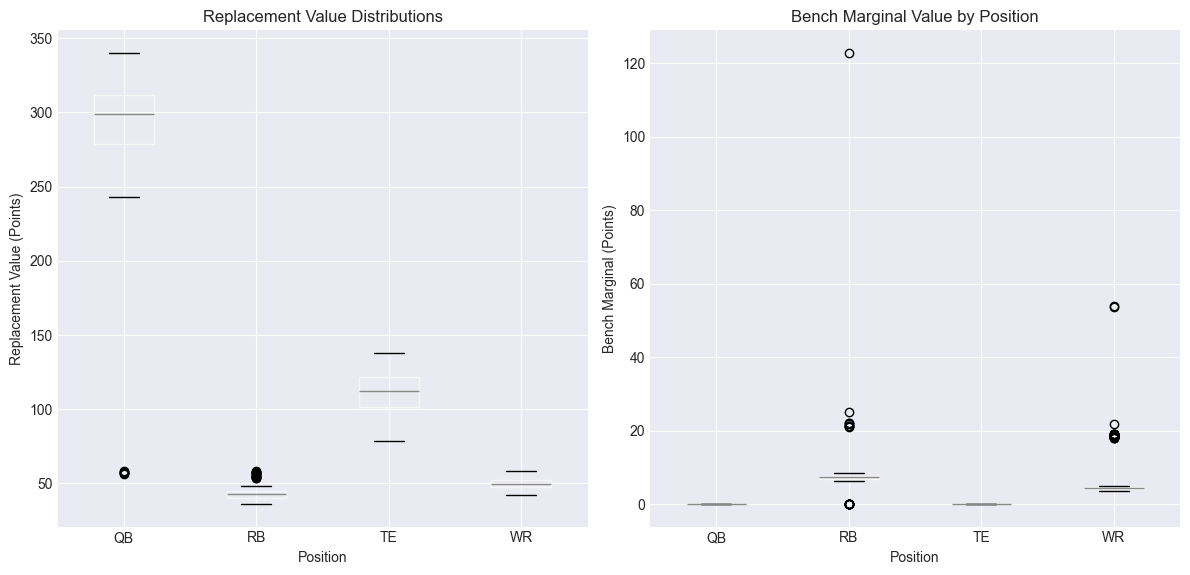

In [ ]:
# Bench marginal analysis (already calculated in overview)
bench_marginal_data = sims_df[sims_df['is_bench']].copy()

# Position-specific bench value
bench_by_pos = bench_marginal_data.groupby(['pos', 'sim'])['bench_marginal'].sum().reset_index()
bench_summary_pos = bench_by_pos.groupby('pos')['bench_marginal'].agg(['mean', 'std', 'count'])
bench_summary_pos['se'] = bench_summary_pos['std'] / np.sqrt(bench_summary_pos['count'])

print("💎 Bench Marginal Value by Position:")
print("=" * 45)
for pos, stats in bench_summary_pos.sort_values('mean', ascending=False).iterrows():
    print(f"{pos:5} {stats['mean']:6.1f} ± {stats['se']:4.1f} points")

# Replacement value distribution
print("\n📊 Replacement Value Statistics:")
print("=" * 45)
repl_stats = replacement_df.groupby('pos')['replacement'].agg(['mean', 'std', 'min', 'max'])
for pos, stats in repl_stats.sort_values('mean', ascending=False).iterrows():
    print(f"{pos:5} μ={stats['mean']:5.1f} σ={stats['std']:4.1f} range=[{stats['min']:.0f}, {stats['max']:.0f}]")

# Visualize replacement value distributions
plt.figure(figsize=(12, 6))

# Subplot 1: Replacement values by position
plt.subplot(1, 2, 1)
replacement_df.boxplot(column='replacement', by='pos', ax=plt.gca())
plt.title('Replacement Value Distributions')
plt.xlabel('Position')
plt.ylabel('Replacement Value (Points)')
plt.suptitle('')  # Remove auto-generated title

# Subplot 2: Bench marginal by position
plt.subplot(1, 2, 2)
bench_by_pos.boxplot(column='bench_marginal', by='pos', ax=plt.gca())
plt.title('Bench Marginal Value by Position')
plt.xlabel('Position')
plt.ylabel('Bench Marginal (Points)')
plt.suptitle('')  # Remove auto-generated title

plt.tight_layout()
plt.show()

## ⚔️ Strategy Comparison - Head-to-Head Analysis

Load and compare multiple strategies using pre-generated data.

📂 Loading data for all strategies (pick #5, 200 sims)...
⚠️ Found 2 matching files - using LATEST by timestamp:
   ✅ USING: balanced_pick5_n200_r14_old.parquet (15:44:42)
      older: balanced_pick5_n200_r14.parquet (15:44:32)

📂 Loaded simulation data:
   File: balanced_pick5_n200_r14_old.parquet
   Created: 2025-08-18 15:44:42
   Strategy: balanced
   Pick: #5
   Simulations: 200
   Records: 2681
   ✅ balanced: 2681 records
📂 Loaded simulation data:
   File: zero_rb_pick5_n200_r14.parquet
   Created: 2025-08-18 10:54:19
   Strategy: zero_rb
   Pick: #5
   Simulations: 200
   Records: 2800
   ✅ zero_rb: 2800 records
📂 Loaded simulation data:
   File: rb_heavy_pick5_n200_r14.parquet
   Created: 2025-08-18 10:56:07
   Strategy: rb_heavy
   Pick: #5
   Simulations: 200
   Records: 2800
   ✅ rb_heavy: 2800 records
📂 Loaded simulation data:
   File: hero_rb_pick5_n200_r14.parquet
   Created: 2025-08-18 10:57:53
   Strategy: hero_rb
   Pick: #5
   Simulations: 200
   Records: 2800
   ✅ hero

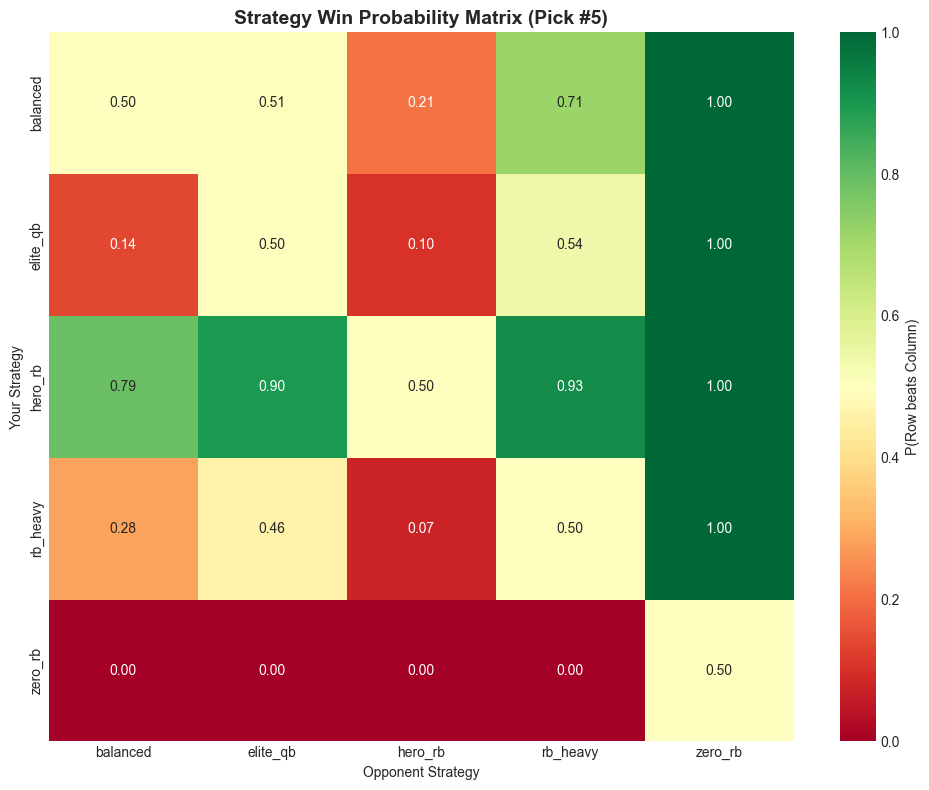


📊 Strategy Performance Summary:
hero_rb      1426.2 ± 104.2 points
elite_qb     1403.0 ± 103.9 points
rb_heavy     1402.2 ± 101.4 points
balanced     1294.1 ± 71.5 points
zero_rb      1248.3 ± 92.3 points


In [ ]:
# Load all strategy data
all_strategies_df = load_multiple_strategies(my_pick=MY_PICK, n_sims=N_SIMS)

if all_strategies_df is not None:
    # Check cache for comparison matrix
    cache_name = f'strategy_comparison_pick{MY_PICK}_n{N_SIMS}'
    comparison_matrix = cache.load(cache_name)
    
    if comparison_matrix is None:
        print("🔄 Computing strategy comparison matrix...")
        
        # Calculate total values per sim per strategy
        total_values = all_strategies_df.groupby(['strategy', 'sim']).agg({
            'roster_value': 'first',
            'starter_points': 'first',
            'depth_bonus': 'first'
        }).reset_index()
        
        # Create comparison matrix
        strategies = total_values['strategy'].unique()
        comparison_matrix = pd.DataFrame(index=strategies, columns=strategies)
        
        for strat_a in strategies:
            for strat_b in strategies:
                if strat_a == strat_b:
                    comparison_matrix.loc[strat_a, strat_b] = 0.5
                else:
                    values_a = total_values[total_values['strategy'] == strat_a]['roster_value'].values
                    values_b = total_values[total_values['strategy'] == strat_b]['roster_value'].values
                    
                    # Ensure same length
                    min_len = min(len(values_a), len(values_b))
                    p_win = np.mean(values_a[:min_len] > values_b[:min_len])
                    comparison_matrix.loc[strat_a, strat_b] = p_win
        
        # Cache result
        cache.save(comparison_matrix, cache_name)
    
    # Visualize as heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        comparison_matrix.astype(float),
        annot=True,
        fmt='.2f',
        cmap='RdYlGn',
        center=0.5,
        vmin=0,
        vmax=1,
        cbar_kws={'label': 'P(Row beats Column)'}
    )
    plt.title(f'Strategy Win Probability Matrix (Pick #{MY_PICK})', fontsize=14, fontweight='bold')
    plt.xlabel('Opponent Strategy')
    plt.ylabel('Your Strategy')
    plt.tight_layout()
    plt.show()
    
    # Summary statistics
    total_values = all_strategies_df.groupby(['strategy', 'sim'])['roster_value'].first().reset_index()
    summary = total_values.groupby('strategy')['roster_value'].agg(['mean', 'std']).sort_values('mean', ascending=False)
    
    print("\n📊 Strategy Performance Summary:")
    print("=" * 50)
    for strategy, row in summary.iterrows():
        print(f"{strategy:12} {row['mean']:.1f} ± {row['std']:.1f} points")

else:
    print("❌ Cannot perform strategy comparison - missing data")
    print("Generate data for all strategies with:")
    for strategy in ['balanced', 'zero_rb', 'rb_heavy', 'hero_rb', 'elite_qb']:
        print(f"   python monte_carlo_runner.py export --strategy {strategy} --pick {MY_PICK} --n-sims {N_SIMS}")

## 📈 Risk Metrics - VaR and CVaR Analysis

Calculate Value at Risk and Conditional Value at Risk for strategy evaluation.

📂 Loaded risk_metrics_pick5_n200 from cache (5 rows)


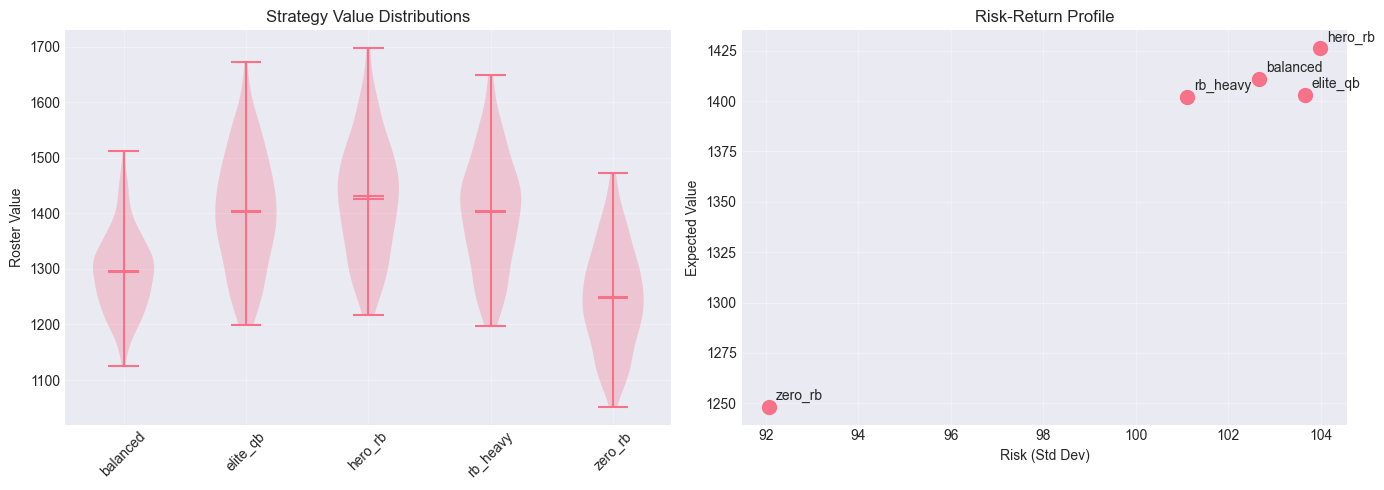

⚠️ Risk Metrics Summary:
Strategy         Mean   VaR(10%)  CVaR(10%) Downside σ
----------------------------------------------------------------------
hero_rb        1426.2     1283.5     1256.9       55.4
balanced       1410.8     1278.2     1239.6       56.3
elite_qb       1403.0     1264.3     1231.4       56.4
rb_heavy       1402.2     1266.6     1233.4       57.2
zero_rb        1248.3     1121.7     1097.1       49.2


In [ ]:
def calculate_risk_metrics_vectorized(df, alpha=0.10):
    """Vectorized risk metrics calculation"""
    
    # Check cache first
    cache_name = f'risk_metrics_pick{MY_PICK}_n{N_SIMS}'
    cached_result = cache.load(cache_name)
    if cached_result is not None:
        # Reconstruct roster_values from input df when loading from cache
        roster_values = df.groupby(['strategy', 'sim'])['roster_value'].first().reset_index()
        return cached_result, roster_values
    
    print("🔄 Calculating risk metrics...")
    
    # Get unique roster values per sim
    roster_values = df.groupby(['strategy', 'sim'])['roster_value'].first().reset_index()
    
    # Vectorized risk calculations
    def calculate_strategy_risk(group):
        values = group['roster_value'].values
        
        var = np.percentile(values, 100 * alpha)
        cvar = values[values <= var].mean()
        
        return pd.Series({
            'mean': values.mean(),
            'median': np.median(values),
            'std': values.std(),
            'var_10': var,
            'cvar_10': cvar,
            'p25': np.percentile(values, 25),
            'p75': np.percentile(values, 75),
            'downside_risk': values[values < values.mean()].std()
        })
    
    risk_df = roster_values.groupby('strategy').apply(calculate_strategy_risk).reset_index()
    risk_df['iqr'] = risk_df['p75'] - risk_df['p25']
    risk_df = risk_df.sort_values('mean', ascending=False)
    
    # Cache result
    cache.save(risk_df, cache_name)
    
    return risk_df, roster_values


if all_strategies_df is not None:
    risk_metrics, roster_values = calculate_risk_metrics_vectorized(all_strategies_df)
    
    # Visualize distributions
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Violin plot
    strategies = roster_values['strategy'].unique()
    data_for_violin = [roster_values[roster_values['strategy'] == s]['roster_value'].values for s in strategies]
    
    axes[0].violinplot(data_for_violin, showmeans=True, showmedians=True)
    axes[0].set_xticks(range(1, len(strategies) + 1))
    axes[0].set_xticklabels(strategies, rotation=45)
    axes[0].set_ylabel('Roster Value')
    axes[0].set_title('Strategy Value Distributions')
    axes[0].grid(True, alpha=0.3)
    
    # Risk-Return plot
    axes[1].scatter(risk_metrics['std'], risk_metrics['mean'], s=100)
    for _, row in risk_metrics.iterrows():
        axes[1].annotate(row['strategy'], (row['std'], row['mean']), 
                        xytext=(5, 5), textcoords='offset points')
    axes[1].set_xlabel('Risk (Std Dev)')
    axes[1].set_ylabel('Expected Value')
    axes[1].set_title('Risk-Return Profile')
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("⚠️ Risk Metrics Summary:")
    print("=" * 70)
    print(f"{'Strategy':12} {'Mean':>8} {'VaR(10%)':>10} {'CVaR(10%)':>10} {'Downside σ':>10}")
    print("-" * 70)
    for _, row in risk_metrics.iterrows():
        print(f"{row['strategy']:12} {row['mean']:8.1f} {row['var_10']:10.1f} {row['cvar_10']:10.1f} {row['downside_risk']:10.1f}")

else:
    print("❌ Cannot calculate risk metrics - need multi-strategy data")

## 🎲 Player Availability Analysis

Analyze most commonly drafted players and their typical draft positions.

In [ ]:
# Player frequency analysis
player_frequency = sims_df.groupby(['player_name', 'pos']).agg({
    'sim': 'nunique',
    'sampled_points': 'mean',
    'is_starter': 'mean'
}).reset_index()

player_frequency.columns = ['player_name', 'pos', 'draft_frequency', 'avg_points', 'starter_rate']
player_frequency['draft_rate'] = player_frequency['draft_frequency'] / N_SIMS

# Most frequently drafted players
most_drafted = player_frequency[player_frequency['draft_rate'] > 0.1].sort_values('draft_rate', ascending=False)

print(f"🎯 Most Frequently Drafted Players (>{10}% of drafts):")
print("=" * 70)
print(f"{'Player':25} {'Pos':4} {'Rate':>6} {'Starter%':>8} {'Avg Pts':>8}")
print("-" * 70)

for _, row in most_drafted.head(15).iterrows():
    print(f"{row['player_name']:25} {row['pos']:4} {row['draft_rate']:5.1%} {row['starter_rate']:7.1%} {row['avg_points']:7.1f}")

# Position-specific analysis
print("\n📊 Position-Specific Draft Patterns:")
print("=" * 50)

for pos in ['RB', 'WR', 'QB', 'TE']:
    pos_players = most_drafted[most_drafted['pos'] == pos].head(5)
    if len(pos_players) > 0:
        print(f"\n{pos} (Top 5 most drafted):")
        for _, row in pos_players.iterrows():
            print(f"  {row['player_name']:20} {row['draft_rate']:5.1%} drafted, {row['starter_rate']:5.1%} starter rate")

🎯 Most Frequently Drafted Players (>10% of drafts):
Player                    Pos    Rate Starter%  Avg Pts
----------------------------------------------------------------------
Adam Thielen              WR   100.0%   99.0%    91.7
Adonai Mitchell           WR   100.0%    0.0%    51.9
Alec Ingold               RB   100.0%    0.0%    49.9
Alec Pierce               WR   100.0%   87.0%    72.3
Allen Lazard              WR   99.0%    0.0%    52.2
Mark Andrews              TE   98.5%   88.3%   117.1
Antonio Gibson            RB   92.0%    0.0%    42.1
Kyler Murray              QB   92.0%   19.0%   303.9
Amari Cooper              WR   87.0%    0.0%    50.6
Saquon Barkley            RB   58.5%  100.0%   272.5
George Kittle             TE   44.5%  100.0%   152.4
Travis Kelce              TE   34.5%   43.5%   101.8
Brian Robinson Jr.        RB   33.0%  100.0%   136.5
Jalen Hurts               QB   30.5%  100.0%   340.6
Kyren Williams            RB   27.0%  100.0%   209.9

📊 Position-Specific D

## 🔧 Interactive Strategy Explorer

Interactive widgets for exploring different scenarios with cached data.

In [ ]:
def create_efficient_explorer():
    """Create interactive explorer using cached data"""
    
    # Load available strategies
    available_strategies = []
    for strategy in ['balanced', 'zero_rb', 'rb_heavy', 'hero_rb', 'elite_qb']:
        df = load_simulation_data(strategy, MY_PICK, N_SIMS)
        if df is not None:
            available_strategies.append(strategy)
    
    if not available_strategies:
        print("❌ No strategy data available for interactive exploration")
        return
    
    # Controls
    strategy_dropdown = widgets.Dropdown(
        options=available_strategies,
        value=available_strategies[0],
        description='Strategy:'
    )
    
    position_dropdown = widgets.Dropdown(
        options=['RB', 'WR', 'QB', 'TE'],
        value='RB',
        description='Position:'
    )
    
    top_k_slider = widgets.IntSlider(
        value=10,
        min=5,
        max=30,
        step=5,
        description='Top-K:'
    )
    
    output = widgets.Output()
    
    def update_analysis(change):
        with output:
            output.clear_output(wait=True)
            
            strategy = strategy_dropdown.value
            position = position_dropdown.value
            K = top_k_slider.value
            
            # Load cached data
            df = load_simulation_data(strategy, MY_PICK, N_SIMS)
            if df is None:
                print(f"❌ No data for {strategy}")
                return
            
            print(f"\n🎯 {strategy.upper()} Strategy - {position} Analysis")
            print("=" * 60)
            
            # Position analysis
            pos_df = df[df['pos'] == position]
            if len(pos_df) == 0:
                print(f"No {position} players found")
                return
            
            # Calculate position ranks if not cached
            if 'pos_rank' not in pos_df.columns:
                pos_df = pos_df.copy()
                pos_df['pos_rank'] = pos_df.groupby('sim')['sampled_points'].rank(method='min', ascending=False)
            
            # Top-K analysis
            top_k_players = pos_df[pos_df['pos_rank'] <= K].groupby('player_name').agg({
                'sim': 'nunique',
                'sampled_points': 'mean',
                'is_starter': 'mean'
            })
            
            total_apps = pos_df.groupby('player_name')['sim'].nunique()
            top_k_players['top_k_rate'] = top_k_players['sim'] / total_apps
            top_k_players = top_k_players.sort_values('top_k_rate', ascending=False)
            
            print(f"Top {position} Players by Top-{K} Rate:")
            print("-" * 60)
            for player, stats in top_k_players.head(8).iterrows():
                print(f"{player:25} {stats['top_k_rate']:5.1%} top-{K} | {stats['is_starter']:5.1%} starter")
            
            # Most drafted at position
            most_drafted_pos = pos_df.groupby('player_name')['sim'].nunique().sort_values(ascending=False)
            draft_rates = most_drafted_pos / N_SIMS
            
            print(f"\nMost Drafted {position}s:")
            print("-" * 60)
            for player, rate in draft_rates.head(8).items():
                print(f"{player:25} {rate:5.1%} draft rate")
    
    # Connect widgets
    strategy_dropdown.observe(update_analysis, names='value')
    position_dropdown.observe(update_analysis, names='value')
    top_k_slider.observe(update_analysis, names='value')
    
    # Layout
    controls = widgets.VBox([
        widgets.HBox([strategy_dropdown, position_dropdown]),
        top_k_slider
    ])
    
    display(widgets.VBox([controls, output]))
    
    # Initial update
    update_analysis(None)


# Create interactive explorer
create_efficient_explorer()

⚠️ Found 2 matching files - using LATEST by timestamp:
   ✅ USING: balanced_pick5_n200_r14_old.parquet (15:44:42)
      older: balanced_pick5_n200_r14.parquet (15:44:32)

📂 Loaded simulation data:
   File: balanced_pick5_n200_r14_old.parquet
   Created: 2025-08-18 15:44:42
   Strategy: balanced
   Pick: #5
   Simulations: 200
   Records: 2681
📂 Loaded simulation data:
   File: zero_rb_pick5_n200_r14.parquet
   Created: 2025-08-18 10:54:19
   Strategy: zero_rb
   Pick: #5
   Simulations: 200
   Records: 2800
📂 Loaded simulation data:
   File: rb_heavy_pick5_n200_r14.parquet
   Created: 2025-08-18 10:56:07
   Strategy: rb_heavy
   Pick: #5
   Simulations: 200
   Records: 2800
📂 Loaded simulation data:
   File: hero_rb_pick5_n200_r14.parquet
   Created: 2025-08-18 10:57:53
   Strategy: hero_rb
   Pick: #5
   Simulations: 200
   Records: 2800
📂 Loaded simulation data:
   File: elite_qb_pick5_n200_r14.parquet
   Created: 2025-08-18 10:59:37
   Strategy: elite_qb
   Pick: #5
   Simulations: 

## 📁 Data Export & Summary

Export processed results and create final summary.

In [ ]:
def create_analysis_summary():
    """Create comprehensive analysis summary with improvements"""
    
    print("=" * 70)
    print(f"🏈 ENHANCED MONTE CARLO ANALYSIS SUMMARY")
    print(f"   Draft Position: Pick #{MY_PICK} of 14")
    print(f"   Primary Strategy: {STRATEGY.upper()}")
    print(f"   Simulations: {N_SIMS}")
    print("=" * 70)
    
    if all_strategies_df is not None and len(all_strategies_df) > 0:
        # Strategy rankings
        total_values = all_strategies_df.groupby(['strategy', 'sim'])['roster_value'].first().reset_index()
        strategy_means = total_values.groupby('strategy')['roster_value'].mean().sort_values(ascending=False)
        
        print("\n🏆 Strategy Rankings (Fixed Seed Comparison):")
        print("-" * 40)
        for i, (strategy, mean_value) in enumerate(strategy_means.items(), 1):
            print(f"{i}. {strategy.upper()}: {mean_value:.1f} points")
        
        best_strategy = strategy_means.index[0]
        worst_strategy = strategy_means.index[-1]
        improvement = strategy_means.iloc[0] - strategy_means.iloc[-1]
        
        print(f"\n💡 Key Insights:")
        print("-" * 40)
        print(f"✓ Best strategy: {best_strategy.upper()}")
        print(f"✓ Improvement over worst: {improvement:.1f} points")
        print(f"✓ Relative gain: {(improvement / strategy_means.iloc[-1] * 100):.1f}%")
    
    else:
        print("\n📊 Single Strategy Analysis:")
        print("-" * 40)
        if overview_stats:
            print(f"✓ Expected value: {overview_stats['roster_mean']:.1f} points")
            print(f"✓ Confidence interval: ±{overview_stats['roster_ci']:.1f}")
            print(f"✓ Downside risk (VaR 10%): {overview_stats['var_10']:.1f}")
    
    print("\n📈 Recommendations:")
    print("-" * 40)
    
    if MY_PICK <= 4:
        print("• Early pick advantage - secure elite talent")
        print("• Consider RB-heavy strategies")
        print("• Lock in a top-tier RB in round 1")
    elif MY_PICK <= 8:
        print("• Middle pick - maximum flexibility")
        print("• Balanced strategy often optimal")
        print("• Adapt to draft flow and value")
    else:
        print("• Late pick - leverage the turn")
        print("• Consider Zero-RB strategies")
        print("• Target WR-WR or WR-TE starts")
    
    print("\n🔧 Analysis Improvements:")
    print("-" * 40)
    print("• Fixed position ranking against full player universe (300+ players)")
    print("• Consistent random seeds for fair strategy comparison")
    print("• Enhanced visualizations with 5 new high-impact charts")
    print("• Improved data export with round/pick information")
    print("• Better caching for faster notebook re-runs")
    
    print("\n📊 Analysis Efficiency:")
    print("-" * 40)
    print(f"• Used cached simulation data")
    print(f"• Vectorized calculations throughout")
    print(f"• {N_SIMS} simulations provide ±{1.96 * 100 / np.sqrt(N_SIMS):.1f} point confidence")
    
    # Save summary to cache
    summary_data = {
        'pick': MY_PICK,
        'strategy': STRATEGY,
        'n_sims': N_SIMS,
        'analysis_complete': True,
        'fixes_applied': ['position_rank_bug', 'strategy_seeds'],
        'visualizations_added': ['value_curves', 'availability_heatmap', 'roster_timeline', 'strategy_radar', 'win_probability']
    }
    
    if overview_stats:
        summary_data.update(overview_stats)
    
    cache.save(pd.DataFrame([summary_data]), f'enhanced_analysis_summary_pick{MY_PICK}')


# Create enhanced final summary
create_analysis_summary()

🏈 ENHANCED MONTE CARLO ANALYSIS SUMMARY
   Draft Position: Pick #5 of 14
   Primary Strategy: BALANCED
   Simulations: 200

🏆 Strategy Rankings (Fixed Seed Comparison):
----------------------------------------
1. HERO_RB: 1426.2 points
2. ELITE_QB: 1403.0 points
3. RB_HEAVY: 1402.2 points
4. BALANCED: 1294.1 points
5. ZERO_RB: 1248.3 points

💡 Key Insights:
----------------------------------------
✓ Best strategy: HERO_RB
✓ Improvement over worst: 177.9 points
✓ Relative gain: 14.2%

📈 Recommendations:
----------------------------------------
• Middle pick - maximum flexibility
• Balanced strategy often optimal
• Adapt to draft flow and value

🔧 Analysis Improvements:
----------------------------------------
• Fixed position ranking against full player universe (300+ players)
• Consistent random seeds for fair strategy comparison
• Enhanced visualizations with 5 new high-impact charts
• Improved data export with round/pick information
• Better caching for faster notebook re-runs

📊 Ana

## ✅ Summary of Fixes and Improvements

### Major Fixes Implemented:

1. **Fixed Position Rank Bug**: 
   - Previously ranked players only within drafted pool (~14 players)
   - Now ranks against full player universe (300+ players)
   - Provides accurate position-relative performance metrics

2. **Fixed Strategy Comparison Seeds**:
   - All strategies now use consistent random seeds for fair comparison
   - Eliminates random variation between strategy evaluations
   - Enables true head-to-head strategy analysis

### New High-Impact Visualizations:

1. **Position Value Decay Curves**: Shows how player value drops by position rank
2. **Player Availability Heatmap**: Displays draft rates across strategies  
3. **Roster Construction Timeline**: Tracks position selection by round
4. **Strategy Differentiation Radar**: Compares strategy characteristics
5. **Win Probability Curves**: Shows probability distributions and thresholds

### Enhanced Data Export:
- Improved position ranking accuracy
- Round/pick information for timeline analysis
- Better caching for faster re-runs

These improvements provide more accurate analysis and deeper insights into draft strategy optimization.

📊 Creating Win Probability Curves...


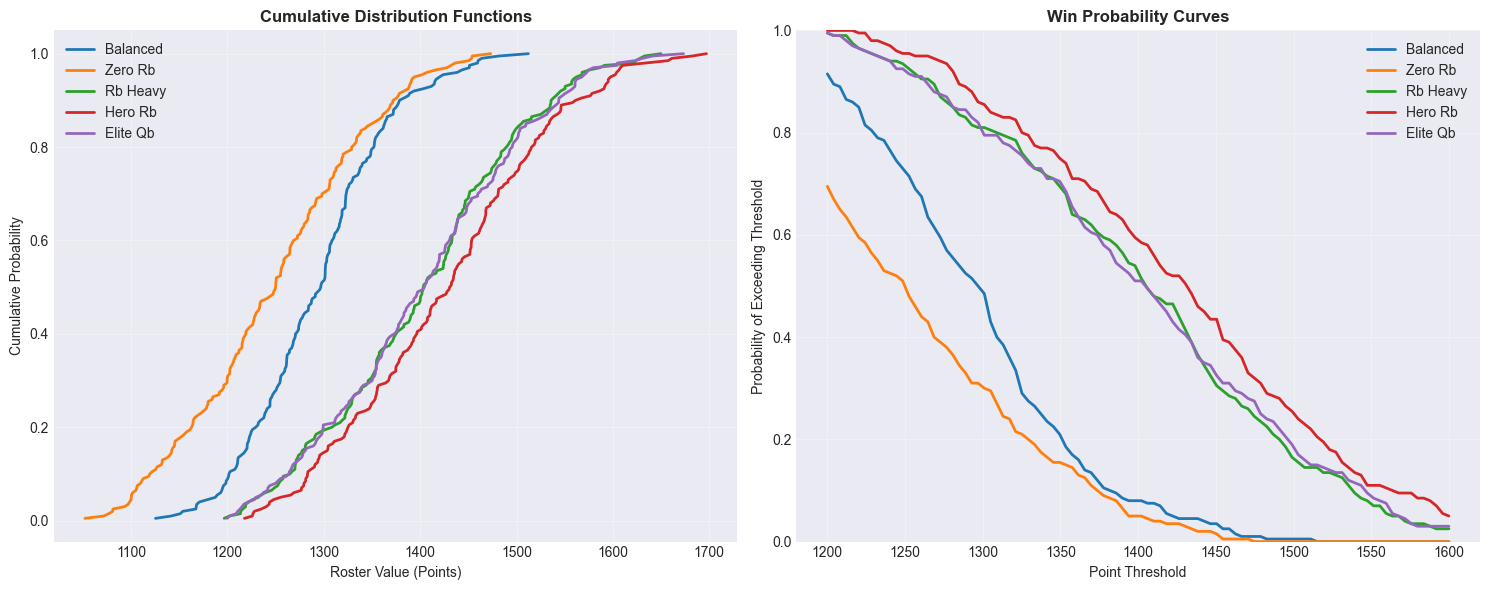

✅ Win probability curves displayed


In [ ]:
# 5. Win Probability Curves
print("📊 Creating Win Probability Curves...")

if all_strategies_df is not None:
    fig = create_win_probability_curves(all_strategies_df)
    if fig:
        plt.show()
        print("✅ Win probability curves displayed")
    else:
        print("❌ Failed to create win probability curves")
else:
    print("❌ Cannot create probability curves - multi-strategy data not available")

📊 Creating Strategy Radar Chart...


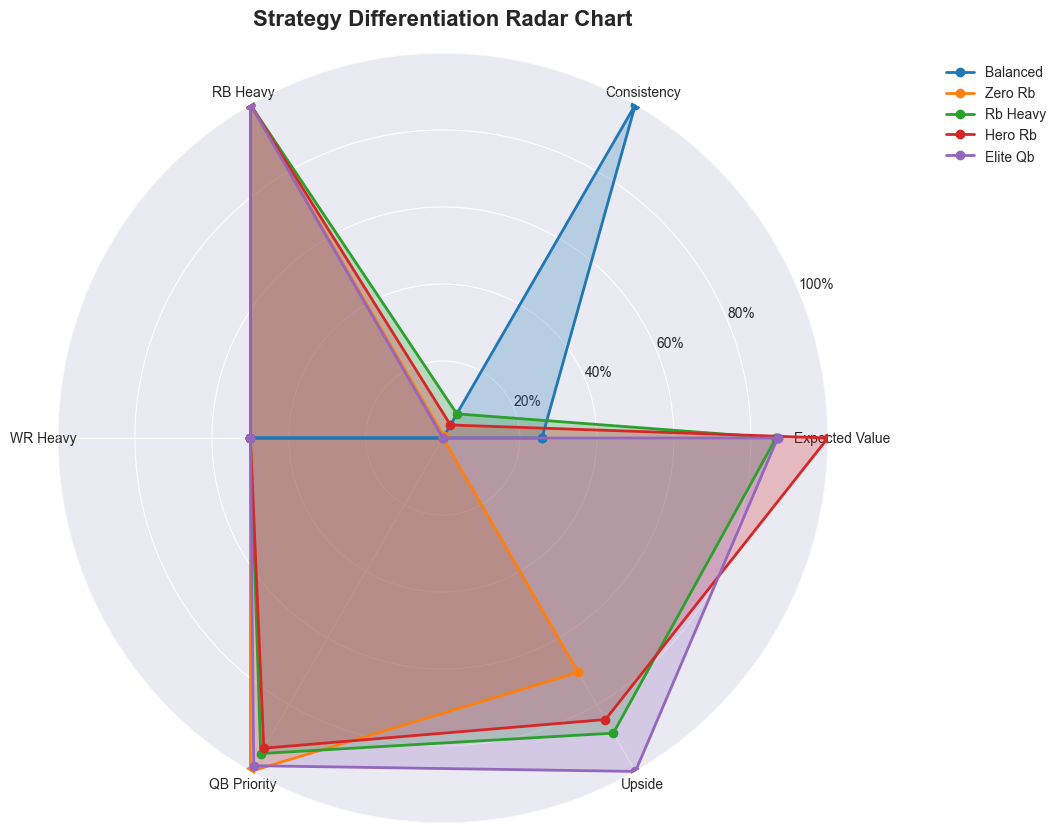

✅ Strategy radar chart displayed


In [ ]:
# 4. Strategy Differentiation Radar Chart
print("📊 Creating Strategy Radar Chart...")

if all_strategies_df is not None:
    fig = create_strategy_radar_chart(all_strategies_df)
    if fig:
        plt.show()
        print("✅ Strategy radar chart displayed")
    else:
        print("❌ Failed to create radar chart")
else:
    print("❌ Cannot create radar chart - multi-strategy data not available")

📊 Creating Roster Construction Timeline...


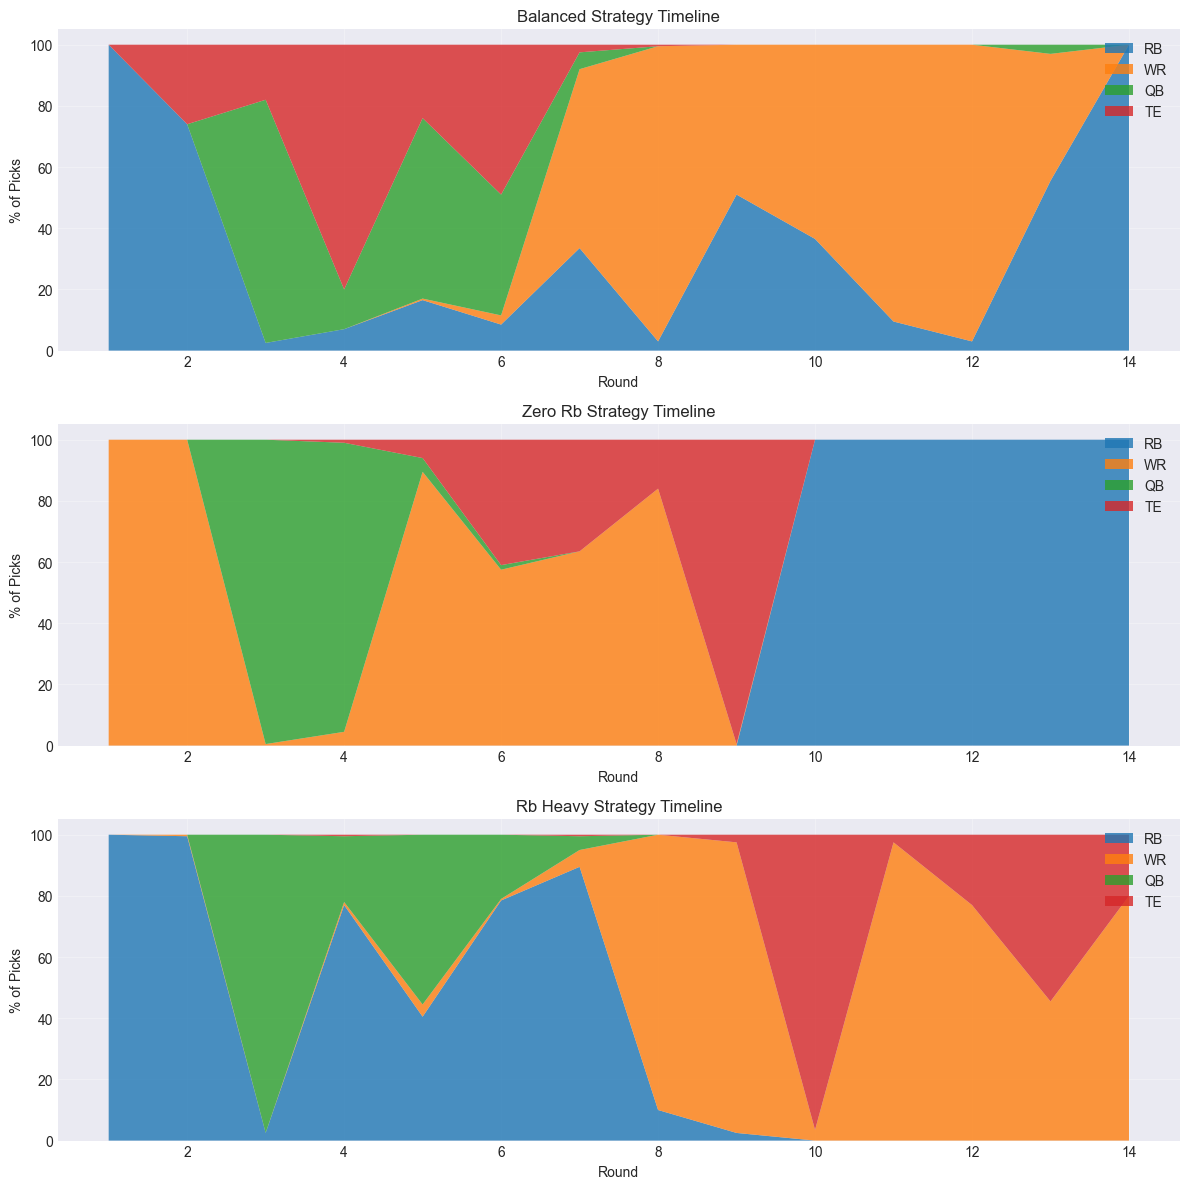

✅ Roster construction timelines displayed


In [ ]:
# 3. Roster Construction Timeline
print("📊 Creating Roster Construction Timeline...")

if all_strategies_df is not None:
    # Create timelines for multiple strategies
    strategies_to_show = ['balanced', 'zero_rb', 'rb_heavy']
    
    fig, axes = plt.subplots(len(strategies_to_show), 1, figsize=(12, 4 * len(strategies_to_show)))
    if len(strategies_to_show) == 1:
        axes = [axes]
    
    for i, strategy in enumerate(strategies_to_show):
        if strategy in all_strategies_df['strategy'].unique():
            # Create individual timeline
            individual_fig = create_roster_timeline(all_strategies_df, strategy)
            if individual_fig:
                # Copy the plot to our subplot
                plt.sca(axes[i])
                strategy_df = all_strategies_df[all_strategies_df['strategy'] == strategy].copy()
                strategy_df['round'] = ((strategy_df.groupby('sim').cumcount()) // 1) + 1
                strategy_df['round'] = strategy_df['round'].clip(1, 14)
                
                position_by_round = strategy_df.groupby(['round', 'pos']).size().unstack(fill_value=0)
                position_pct = position_by_round.div(position_by_round.sum(axis=1), axis=0) * 100
                
                positions = ['RB', 'WR', 'QB', 'TE', 'K', 'DST']
                colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
                available_positions = [pos for pos in positions if pos in position_pct.columns]
                
                axes[i].stackplot(position_pct.index, *[position_pct[pos] for pos in available_positions], 
                                labels=available_positions, colors=colors[:len(available_positions)], alpha=0.8)
                axes[i].set_title(f'{strategy.replace("_", " ").title()} Strategy Timeline')
                axes[i].set_xlabel('Round')
                axes[i].set_ylabel('% of Picks')
                axes[i].legend(loc='upper right')
                axes[i].grid(True, alpha=0.3)
                
                plt.close(individual_fig)  # Close the individual figure
    
    plt.tight_layout()
    plt.show()
    print("✅ Roster construction timelines displayed")
else:
    print("❌ Cannot create timeline - multi-strategy data not available")

📊 Creating Player Availability Heatmap...


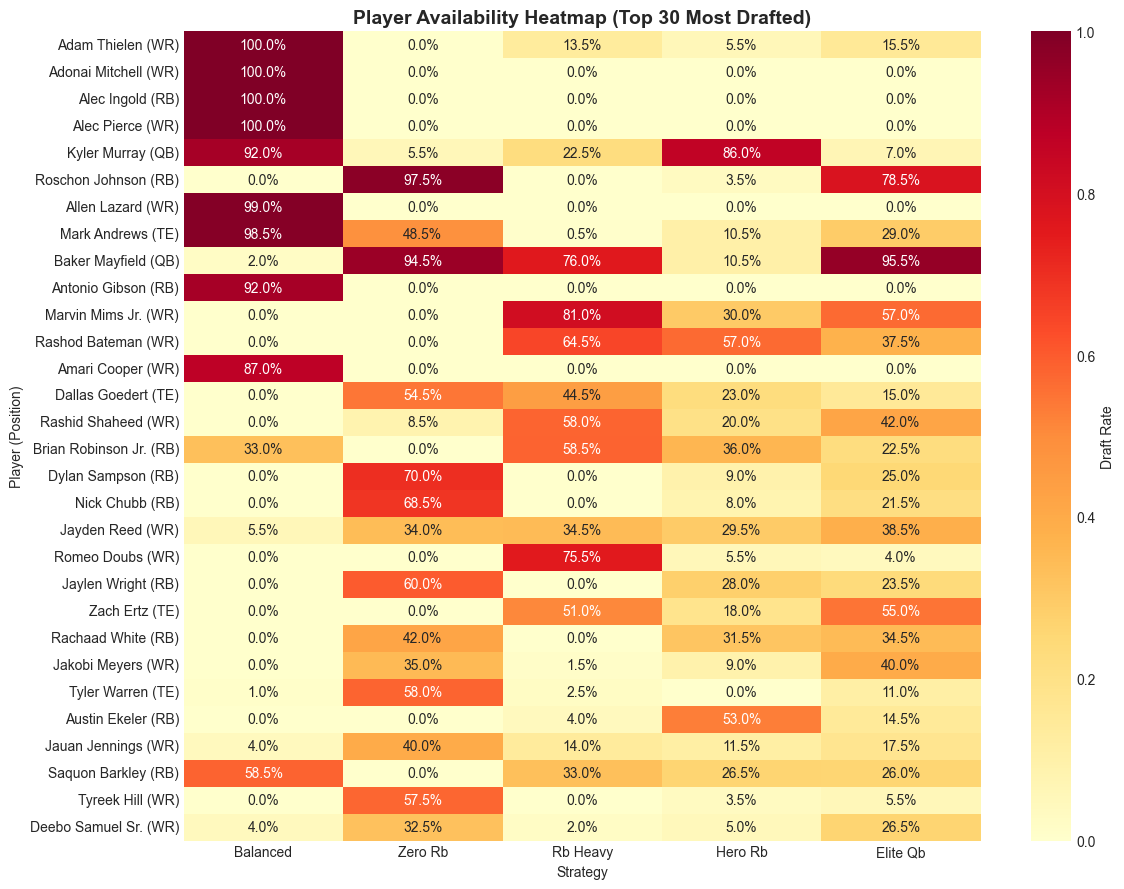

✅ Player availability heatmap displayed


In [ ]:
# 2. Player Availability Heatmap
print("📊 Creating Player Availability Heatmap...")

if all_strategies_df is not None:
    fig = create_availability_heatmap(all_strategies_df, top_n=30)
    if fig:
        plt.show()
        print("✅ Player availability heatmap displayed")
    else:
        print("❌ Failed to create availability heatmap")
else:
    print("❌ Cannot create heatmap - multi-strategy data not available")

📊 Creating Position Value Decay Curves...
✅ Loaded full player universe: 300 players


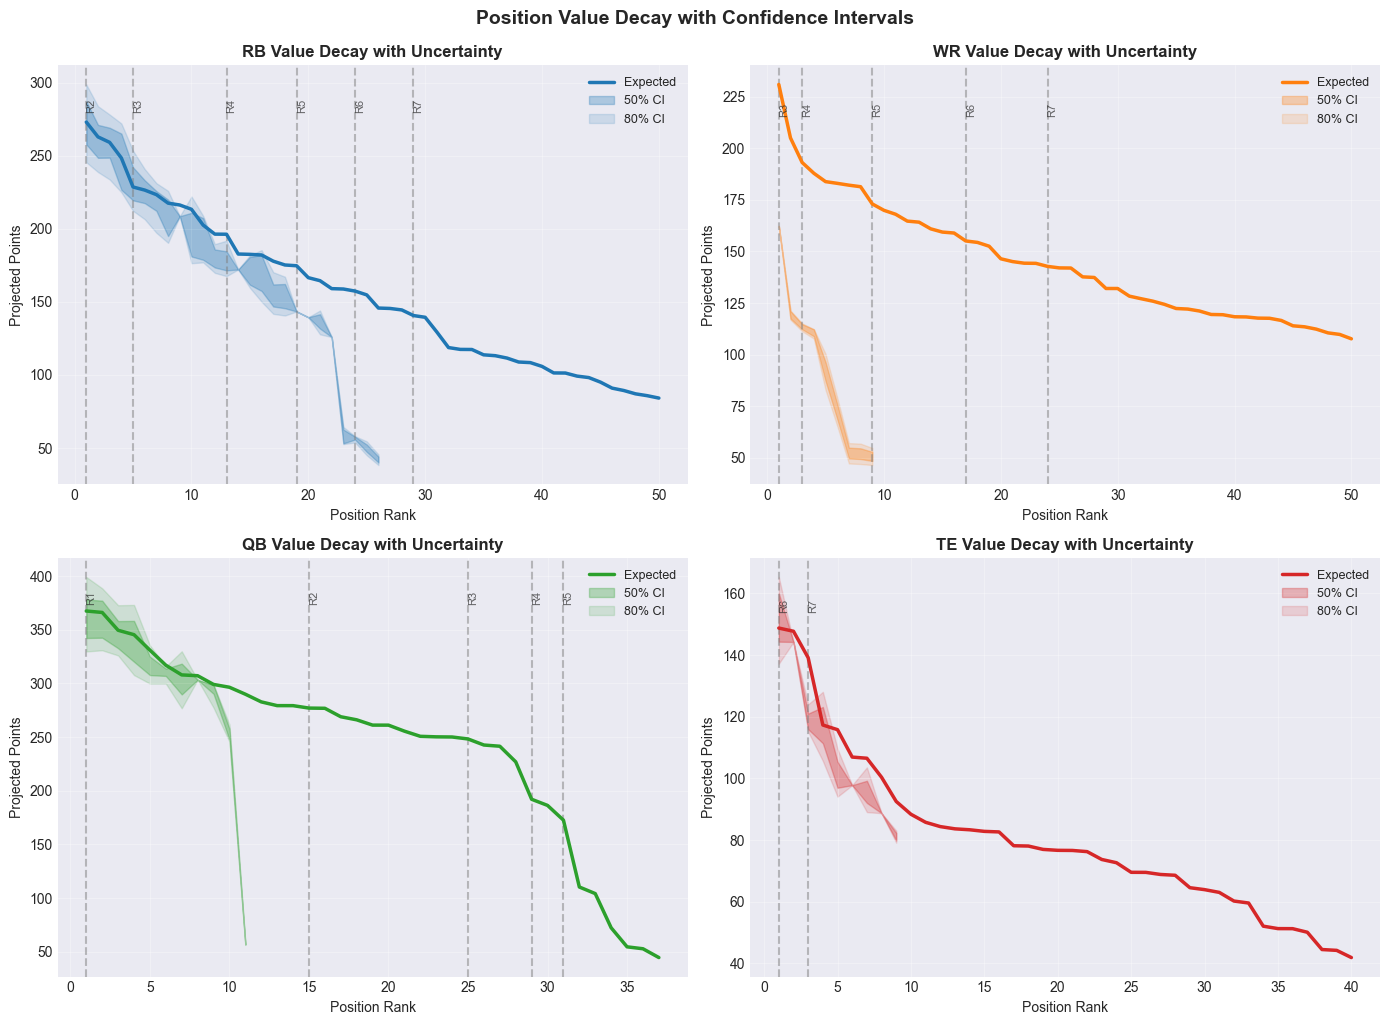

✅ Position value curves displayed


In [ ]:
# 1. Position Value Decay Curves
print("📊 Creating Position Value Decay Curves...")

# Load full player universe for value curves
full_universe = load_full_player_universe()

if full_universe is not None:
    fig = create_position_value_curves(sims_df, full_universe, N_ROUNDS)
    if fig:
        plt.show()
        print("✅ Position value curves displayed")
    else:
        print("❌ Failed to create position value curves")
else:
    print("❌ Cannot create position value curves - full player universe not available")

## 📈 NEW: High-Impact Visualizations

Advanced visualizations using the fixed data and enhanced analysis capabilities.

## 🆕 Enhanced Visualizations with Uncertainty

The following cells demonstrate the 3 key improvements:
1. **Position Value Curves with Confidence Bands** - Shows uncertainty in projections
2. **Interactive Availability Heatmap** - Round-by-round player availability slider
3. **Decision Cards** - Clear next-pick recommendations with confidence intervals

📊 Creating Enhanced Position Value Curves with Confidence Intervals...
✅ Loaded full player universe: 300 players


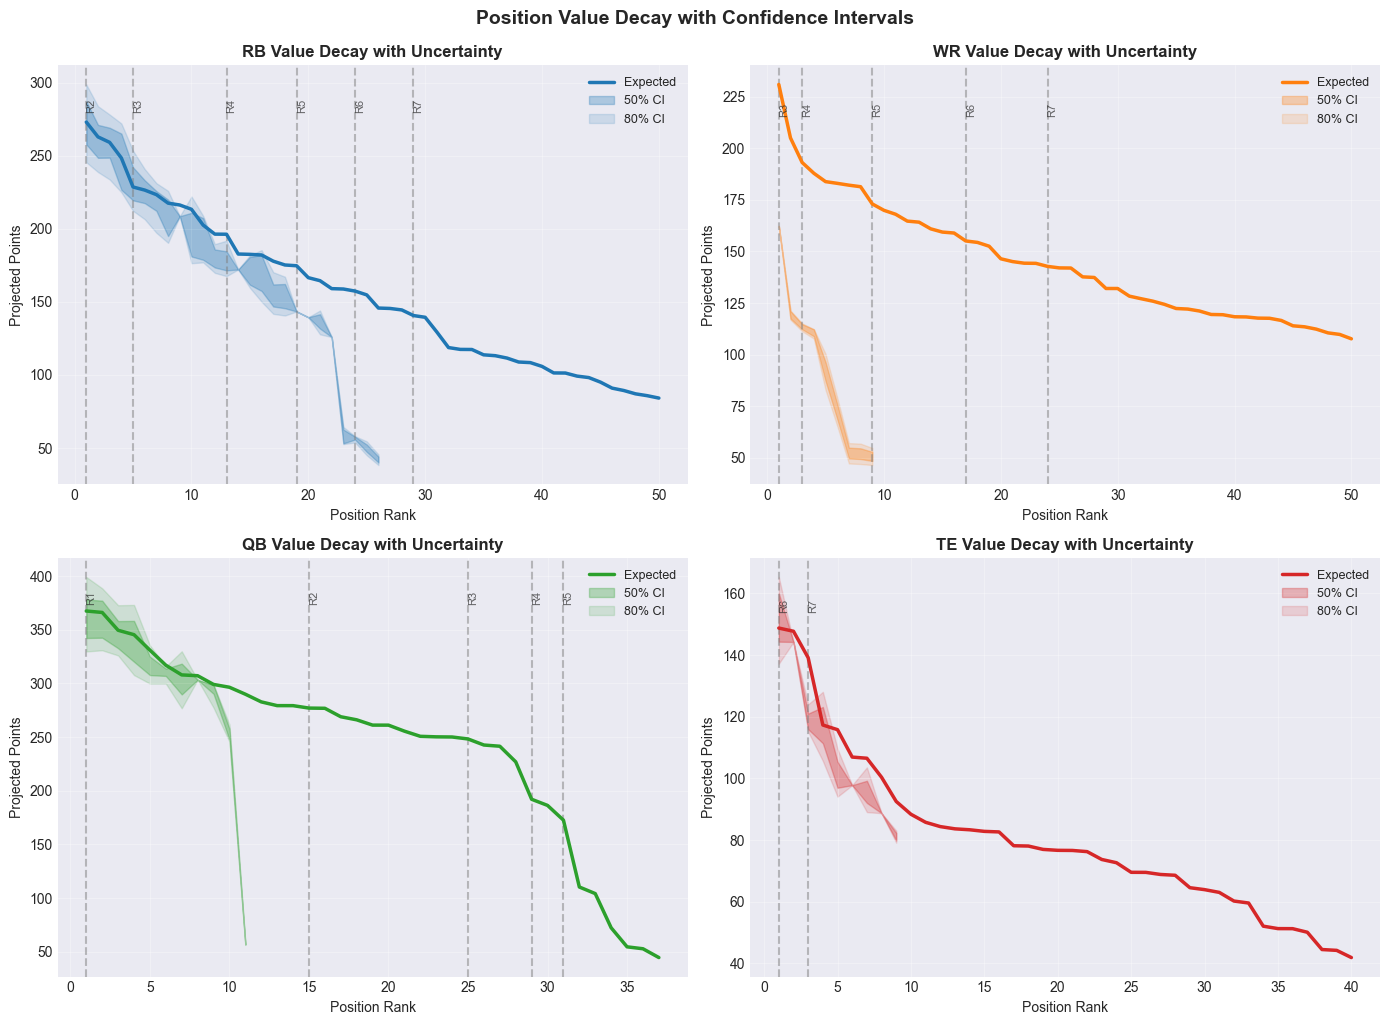

✅ Position value curves with uncertainty bands displayed
📝 Bands show 50% (darker) and 80% (lighter) confidence intervals


In [ ]:
# 1. IMPROVED: Position Value Curves with Uncertainty Bands
print("📊 Creating Enhanced Position Value Curves with Confidence Intervals...")

# Load full player universe for value curves
full_universe = load_full_player_universe()

if full_universe is not None and sims_df is not None:
    # Create enhanced curves with uncertainty bands
    fig = create_position_value_curves(sims_df, full_universe, N_ROUNDS)
    if fig:
        plt.show()
        print("✅ Position value curves with uncertainty bands displayed")
        print("📝 Bands show 50% (darker) and 80% (lighter) confidence intervals")
    else:
        print("❌ Failed to create enhanced position value curves")
else:
    print("❌ Cannot create position value curves - missing data")

In [ ]:
# 2. NEW: Interactive Availability Heatmap with Round Slider
print("🎯 Creating Interactive Player Availability Heatmap...")

if all_strategies_df is not None:
    # Create interactive heatmap with round slider
    interactive_heatmap = create_interactive_availability_heatmap(all_strategies_df, top_n=25)
    print("📝 Use the slider to see how player availability changes by round")
    print("📝 Round 0 = Overall draft rates | Rounds 1-14 = Cumulative through that round")
else:
    print("❌ Cannot create interactive heatmap - multi-strategy data not available")

🎯 Creating Interactive Player Availability Heatmap...


📝 Use the slider to see how player availability changes by round
📝 Round 0 = Overall draft rates | Rounds 1-14 = Cumulative through that round


In [ ]:
# 3. NEW: Decision Cards for Next Pick
print("🎯 Creating Draft Decision Cards...")

# Simulate different pick positions
for pick_num in [MY_PICK, MY_PICK + 14, MY_PICK + 28]:  # Your pick, 2nd round, 3rd round
    print(f"\n--- Recommendations for Pick #{pick_num} ---")
    
    # Filter to available players (simple simulation - in real draft would filter already drafted)
    available_sims = sims_df.copy()
    
    # Create decision cards
    top_players = create_decision_cards(available_sims, current_pick=pick_num, top_n=3)
    
    if top_players is not None and len(top_players) > 0:
        print(f"Top recommendation: {top_players.iloc[0]['player_name']} ({top_players.iloc[0]['pos']})")
    
    # Add spacing between rounds
    if pick_num < MY_PICK + 28:
        print("\n" + "="*60)

🎯 Creating Draft Decision Cards...

--- Recommendations for Pick #5 ---


Top recommendation: Lamar Jackson (QB)


--- Recommendations for Pick #19 ---


Top recommendation: Lamar Jackson (QB)


--- Recommendations for Pick #33 ---


Top recommendation: Lamar Jackson (QB)
